Dots per dimension = 6,250,000
Calculating the volume of a unit  2-ball . . .
Calculating the volume of a unit  3-ball . . .
Calculating the volume of a unit  4-ball . . .
Calculating the volume of a unit  5-ball . . .
Calculating the volume of a unit  6-ball . . .
Calculating the volume of a unit  7-ball . . .
Calculating the volume of a unit  8-ball . . .
Calculating the volume of a unit  9-ball . . .
Calculating the volume of a unit 10-ball . . .
Calculating the volume of a unit 11-ball . . .
Calculating the volume of a unit 12-ball . . .


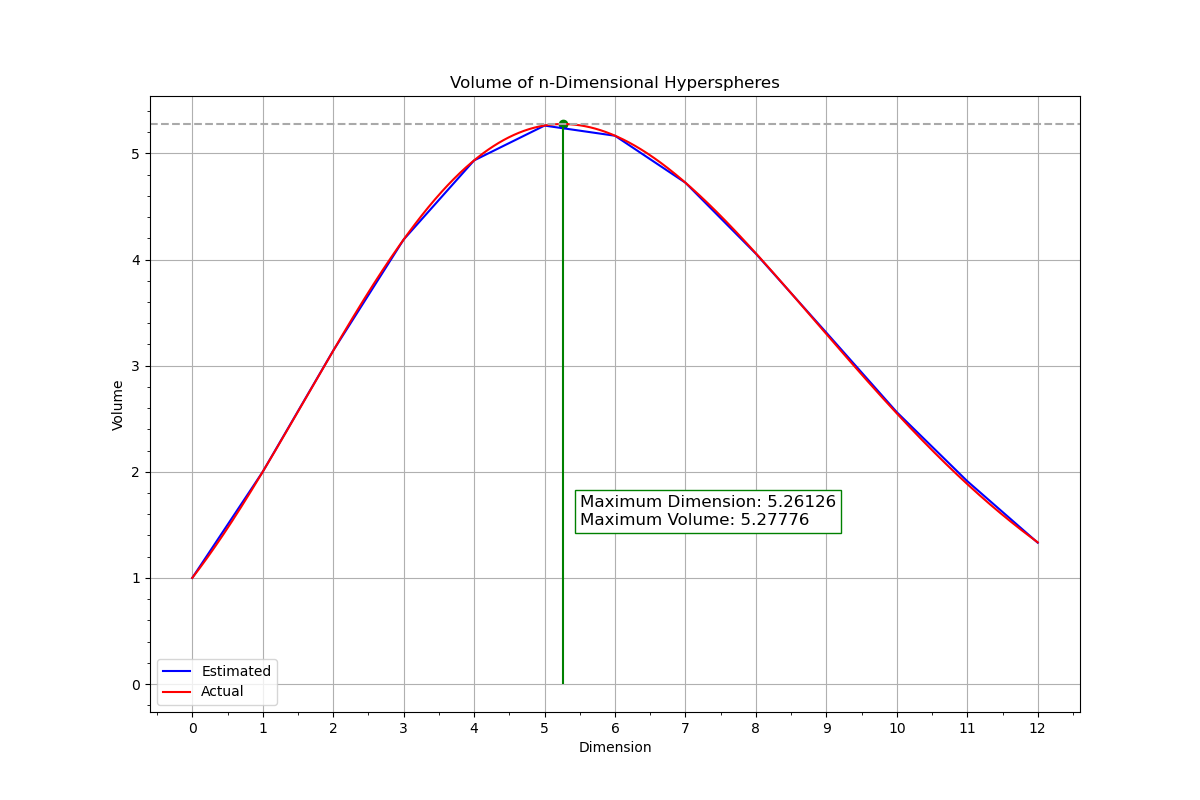

In [1]:
# mc_high_dimensions.ipynb

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from numba import float64, vectorize
from scipy.signal import find_peaks
from scipy.special import gamma


@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p):
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_actual(ax):
    act_x = np.linspace(0, 12, 1000)
    act_y = np.power(np.pi, act_x / 2) / gamma(act_x / 2 + 1)
    ax.plot(act_x, act_y, color="red", label="Actual")
    max_idx, _ = find_peaks(act_y)# returns back index of highest value
    max_idx = max_idx[0]
    max_dim = act_x[max_idx]
    max_vol = act_y[max_idx]
    ax.scatter(max_dim, max_vol, marker="o", color="green")
    ax.vlines(max_dim, 0, max_vol, color="green")
    ax.axhline(max_vol, linestyle="dashed", color="darkgray")
    ax.text(
        5.5,
        1.5,
        f"Maximum Dimension: {max_dim:.5f}\n" f"Maximum Volume: {max_vol:.5f}",
        fontsize="large",
        bbox=dict(boxstyle="square", facecolor="white", edgecolor="green"),
    )


def plot_hypersphere_volume(ax):
    iterations = 50**4
    print(f"Dots per dimension = {iterations:,}")

    primes = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37])

    dimensions = 13 #13 dimensions
    
    #declaring base cases
    est_volume = np.zeros(dimensions)
    est_volume[0] = 1  # By definition
    est_volume[1] = 2  # The 1-D interval [-1,1] has length 2

    # Prime the loop by generating the X-coordinates for the 2-D circle
    v = halton(np.arange(iterations), primes[0]) * 2 - 1
    d = v**2

    for dimension in range(2, dimensions):
        print(f"Calculating the volume of a unit {dimension:>2}-ball . . .")
        v = halton(np.arange(iterations), primes[dimension - 1]) * 2 - 1
        d += v**2
        est_volume[dimension] = (
            np.count_nonzero(d <= 1.0) / iterations * np.power(2, dimension)
        )

    ax.plot(np.arange(dimensions), est_volume, color="blue", label="Estimated")

    plot_actual(ax)

    ax.set_title("Volume of n-Dimensional Hyperspheres")
    ax.set_xlabel("Dimension")
    ax.set_ylabel("Volume")
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid()
    ax.legend()


def main():
    plt.close("all")
    fig = plt.figure(label=" ")
    fig.set_size_inches(12, 8)
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])
    plot_hypersphere_volume(ax)

    plt.show()


main()